In [5]:
!pip install statsmodels

     |████████████████████████████████| 10.8MB 5.6MB/s eta 0:00:01
     |████████████████████████████████| 235kB 98.9MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
pip install scikit-learn

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
!pip install fosforml

     |████████████████████████████████| 51kB 3.5MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 11.5MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 78.7MB/s eta 0:00:01
     |████████████████████████████████| 174kB 95.8MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 75.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 18.0MB/s eta 0:00:01
     |████████████████████████████████| 51kB 26.0MB/s eta 0:00:01
     |████████████████████████████████| 200.3MB 128kB/s s eta 0:00:01
     |████████████████████████████████| 40.1MB 77.2MB/s eta 0:00:01
     |████████████████████████████████| 2.5MB 75.1MB/s eta 0:00:01
     |████████████████████████████████| 133kB 117.1MB/s eta 0:00:01
     |████████████████████████████████| 98.7MB 331kB/s s eta 0:00:01
     |████████████████████████████████| 81kB 34.1MB/s  eta 0:00:01
     |████████████████████████████████| 1.6MB 82.8MB/s eta 0:00:01
     |████████████████████████████████| 317kB 110.1MB/s et

In [12]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = '"HISTORICAL_YIELD_RATE"'
 
sf_df = my_session.sql("select * from {}".format(table_name))
data = sf_df.to_pandas()

In [14]:
pip install --upgrade scikit-learn

  Using cached https://files.pythonhosted.org/packages/2a/9d/d332ec76e2cc442fce98bc43a44e69d3c281e6b4ede6b6db2616dc6fbec6/scikit_learn-1.5.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
ERROR: snowflake-ml-python 1.5.0 has requirement scikit-learn<1.4,>=1.2.1, but you'll have scikit-learn 1.5.2 which is incompatible.
ERROR: fosforml 1.1.8 has requirement scikit-learn==1.3.2, but you'll have scikit-learn 1.5.2 which is incompatible.
  Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
# Convert YEAR_MONTH to datetime and extract features
data['YEAR_MONTH'] = pd.to_datetime(data['YEAR_MONTH'])
data['YEAR'] = data['YEAR_MONTH'].dt.year
data['MONTH'] = data['YEAR_MONTH'].dt.month

In [8]:
# Prepare the dataset for training
X = data[['YEAR', 'MONTH']]
y = data['YIELD_RATE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate R2 and RMSE for the training set
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"R2 for the training set: {r2:.6f}")
print(f"RMSE for the training set: {rmse:.6f}")

# Predict the yield rate for the next 1 year (12 months)
future_dates = pd.date_range(start='2024-12-01', periods=12, freq='M')
future_data = pd.DataFrame({'YEAR': future_dates.year, 'MONTH': future_dates.month})
future_predictions = model.predict(future_data)

# Print the predictions
for date, prediction in zip(future_dates, future_predictions):
    print(f"Predicted Yield Rate for {date.strftime('%Y-%m')} is {prediction:.6f}")


R2 for the training set: 0.003851
RMSE for the training set: 0.084005
Predicted Yield Rate for 2024-12 is 0.824527
Predicted Yield Rate for 2025-01 is 0.806913
Predicted Yield Rate for 2025-02 is 0.808377
Predicted Yield Rate for 2025-03 is 0.809840
Predicted Yield Rate for 2025-04 is 0.811304
Predicted Yield Rate for 2025-05 is 0.812767
Predicted Yield Rate for 2025-06 is 0.814231
Predicted Yield Rate for 2025-07 is 0.815694
Predicted Yield Rate for 2025-08 is 0.817158
Predicted Yield Rate for 2025-09 is 0.818621
Predicted Yield Rate for 2025-10 is 0.820085
Predicted Yield Rate for 2025-11 is 0.821548


In [12]:


# Prepare the dataset for training
X = data[['YEAR', 'MONTH']]
y = data['YIELD_RATE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate R2 and RMSE for the training set
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"R2 for the training set: {r2:.6f}")
print(f"RMSE for the training set: {rmse:.6f}")

# Initialize a DataFrame to store all predictions
all_predictions = pd.DataFrame()

# Iterate over each product type to predict the yield rate for the next 1 year (12 months)
for product in data['PRODUCT_TYPE'].unique():
    # Predict the yield rate for the next 1 year (12 months)
    future_dates = pd.date_range(start='2024-12-01', periods=12, freq='M')
    future_data = pd.DataFrame({'YEAR': future_dates.year, 'MONTH': future_dates.month})
    future_predictions = model.predict(future_data)
    
    # Store the predictions in a DataFrame
    predictions_df = pd.DataFrame({
        'PRODUCT_TYPE': product,
        'YEAR_MONTH': future_dates.strftime('%Y-%m'),
        'PREDICTED_YIELD_RATE': future_predictions
    })
    
    # Append the predictions to the all_predictions DataFrame
    all_predictions = pd.concat([all_predictions, predictions_df], ignore_index=True)

# Save the predictions to a CSV file
all_predictions.to_csv('predicted_yield_rates_all_products_single_model.csv', index=False)

print("The predictions have been saved to 'predicted_yield_rates_all_products_single_model.csv'.")


R2 for the training set: 0.003851
RMSE for the training set: 0.084005
The predictions have been saved to 'predicted_yield_rates_all_products_single_model.csv'.


In [17]:
# Convert YEAR_MONTH to datetime and extract features
data['YEAR_MONTH'] = pd.to_datetime(data['YEAR_MONTH'])
data['YEAR'] = data['YEAR_MONTH'].dt.year
data['MONTH'] = data['YEAR_MONTH'].dt.month

# Initialize a DataFrame to store all predictions
all_predictions = pd.DataFrame()

# Initialize a DataFrame to store all metrics
all_metrics = pd.DataFrame(columns=['PRODUCT_TYPE', 'R2', 'RMSE'])

# Iterate over each product type
for product in data['PRODUCT_TYPE'].unique():
    # Filter the data for the current product
    product_data = data[data['PRODUCT_TYPE'] == product]
    
    # Prepare the dataset for training
    X = product_data[['YEAR', 'MONTH']]
    y = product_data['YIELD_RATE']
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Calculate R2 and RMSE for the training set
    r2 = r2_score(y_train, y_train_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Print the R2 and RMSE values for the current product
    print(f'Product: {product}, R2: {r2}, RMSE: {rmse}')
    
    # Store the metrics in the DataFrame
    all_metrics = pd.concat([all_metrics, pd.DataFrame({'PRODUCT_TYPE': [product], 'R2': [r2], 'RMSE': [rmse]})], ignore_index=True)
    
    # Predict the yield rate for the next 1 year (12 months)
    future_dates = pd.date_range(start='2024-12-01', periods=12, freq='M')
    future_data = pd.DataFrame({'YEAR': future_dates.year, 'MONTH': future_dates.month})
    future_predictions = model.predict(future_data)
    
    # Store the predictions in a DataFrame
    predictions_df = pd.DataFrame({
        'PRODUCT_TYPE': product,
        'YEAR_MONTH': future_dates.strftime('%Y-%m'),
        'PREDICTED_YIELD_RATE': future_predictions
    })
    
    # Append the predictions to the all_predictions DataFrame
    all_predictions = pd.concat([all_predictions, predictions_df], ignore_index=True)

# Save the predictions to a CSV file
all_predictions.to_csv('predicted_yield_rates_all_products.csv', index=False)

# Save the metrics to a CSV file
all_metrics.to_csv('model_metrics_all_products.csv', index=False)

print("The predictions have been saved to 'predicted_yield_rates_all_products.csv'.")
print("The model metrics have been saved to 'model_metrics_all_products.csv'.")


Product: Acura, R2: 0.06653916013707695, RMSE: 0.08548674780963467
Product: Alfa Romeo, R2: 0.15303447861533437, RMSE: 0.060360579685079095
Product: Aston Martin, R2: 0.016093569007494146, RMSE: 0.07291780063150004
Product: Audi, R2: 0.020453559786329012, RMSE: 0.07192073152826799
Product: BMW, R2: 0.036344910057877655, RMSE: 0.06720704626269643
Product: Bentley, R2: 0.0851273666666642, RMSE: 0.06902576901828013
Product: Bugatti, R2: 0.01221422402468153, RMSE: 0.062180119719322496
Product: Buick, R2: 0.05234923668136138, RMSE: 0.0835802840893066
Product: Cadillac, R2: 0.005219453542069763, RMSE: 0.09195961476861012
Product: Chevrolet, R2: 0.1253126728422439, RMSE: 0.07416506422650498
Product: Chrysler, R2: 0.13340700395584892, RMSE: 0.07381643189248731
Product: Citroen, R2: 0.14720624761507373, RMSE: 0.05985861441926206
Product: Daihatsu, R2: 0.11938638248726907, RMSE: 0.07484837930254974
Product: Dodge, R2: 0.005265504416486877, RMSE: 0.09468819161209076
Product: Ferrari, R2: 0.101522

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [25]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = '"FACT_TABLE"'
 
sf_df = my_session.sql("select * from {}".format(table_name))
df = sf_df.to_pandas()

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta


# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to train a single model and forecast for each product type
def train_and_forecast_yield(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df



# Forecast Yield Rates
forecast_df = train_and_forecast_yield(df, forecast_years=2, num_lags=3)

    # Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)


PRODUCT_TYPE: Acura | RMSE: 0.0609 | R2: -10.6494
PRODUCT_TYPE: BMW | RMSE: 0.0369 | R2: 0.3395
PRODUCT_TYPE: Bentley | RMSE: 1.0023 | R2: -50.7788
PRODUCT_TYPE: Bugatti | RMSE: 0.5731 | R2: -28.7952
PRODUCT_TYPE: Chevrolet | RMSE: 0.1354 | R2: -1.8645
PRODUCT_TYPE: Chrysler | RMSE: 0.0338 | R2: 0.8217
PRODUCT_TYPE: Citroen | RMSE: 0.0602 | R2: -1.2314
PRODUCT_TYPE: Daihatsu | RMSE: 0.1265 | R2: -0.4736
PRODUCT_TYPE: Dodge | RMSE: 0.0015 | R2: 0.9981
PRODUCT_TYPE: Ferrari | RMSE: 0.0352 | R2: 0.8624
PRODUCT_TYPE: Ford | RMSE: 0.0463 | R2: -20.4394
PRODUCT_TYPE: Genesis | RMSE: 0.0570 | R2: 0.8397
PRODUCT_TYPE: Honda | RMSE: 0.0846 | R2: -3.2348
PRODUCT_TYPE: Hyundai | RMSE: 2.3216 | R2: -1324.4185
PRODUCT_TYPE: Infiniti | RMSE: 0.4555 | R2: -19.8371
PRODUCT_TYPE: Jaguar | RMSE: 0.0489 | R2: 0.3707
PRODUCT_TYPE: Kia | RMSE: 0.0965 | R2: 0.0000
PRODUCT_TYPE: Lamborghini | RMSE: 0.2781 | R2: 0.0000
PRODUCT_TYPE: Land Rover | RMSE: 0.0639 | R2: -162.3244
PRODUCT_TYPE: Lexus | RMSE: 0.0494 

In [24]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [30]:
# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to train and forecast using XGBoost
def train_and_forecast_xgboost(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the XGBoost model
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df


    # Forecast Yield Rates using XGBoost
forecast_df = train_and_forecast_xgboost(df, forecast_years=2, num_lags=3)

    # Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)



ImportError: sklearn needs to be installed in order to use this module

In [27]:
pip install scikit-learn xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
!pip install scikit-learn xgboost pandas numpy openpyxl

     |████████████████████████████████| 256kB 6.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to train and forecast using XGBoost
def train_and_forecast_xgboost(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the XGBoost model
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df

forecast_df = train_and_forecast_xgboost(df, forecast_years=2, num_lags=3)

    # Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)

PRODUCT_TYPE: Acura | RMSE: 0.0937 | R2: -10.4196


ValueError: training data did not have the following fields: YIELD_RATE_Lag_1, YIELD_RATE_Lag_2, YIELD_RATE_Lag_3, TEMPERATURE, HUMIDITY, DOWNTIME, DEFECT_COUNT, SHIFT_ENC

In [32]:
pip install --upgrade pip

     |████████████████████████████████| 1.8MB 5.3MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = '"FACT_TABLE"'
 
sf_df = my_session.sql("select * from {}".format(table_name))
df = sf_df.to_pandas()

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to train and forecast using Linear Regression
def train_and_forecast_linear_regression(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df

# Assuming df is your DataFrame loaded from the CSV file.
# df = pd.read_csv('2024-11-15 11_38am (2).csv')  # Uncomment this line to load your dataset

# For demonstration purposes, let's create a sample DataFrame similar to your description.


#df_sample = pd.DataFrame(data_sample)

forecast_df = train_and_forecast_linear_regression(df, forecast_years=2, num_lags=3)

# Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)

PRODUCT_TYPE: Acura | RMSE: 0.0609 | R2: -10.6494
PRODUCT_TYPE: BMW | RMSE: 0.0369 | R2: 0.3395
PRODUCT_TYPE: Bentley | RMSE: 1.0023 | R2: -50.7788
PRODUCT_TYPE: Bugatti | RMSE: 0.5731 | R2: -28.7952
PRODUCT_TYPE: Chevrolet | RMSE: 0.1354 | R2: -1.8645
PRODUCT_TYPE: Chrysler | RMSE: 0.0338 | R2: 0.8217
PRODUCT_TYPE: Citroen | RMSE: 0.0602 | R2: -1.2314
PRODUCT_TYPE: Daihatsu | RMSE: 0.1265 | R2: -0.4736
PRODUCT_TYPE: Dodge | RMSE: 0.0015 | R2: 0.9981
PRODUCT_TYPE: Ferrari | RMSE: 0.0352 | R2: 0.8624
PRODUCT_TYPE: Ford | RMSE: 0.0463 | R2: -20.4394
PRODUCT_TYPE: Genesis | RMSE: 0.0570 | R2: 0.8397
PRODUCT_TYPE: Honda | RMSE: 0.0846 | R2: -3.2348
PRODUCT_TYPE: Hyundai | RMSE: 2.3216 | R2: -1324.4185
PRODUCT_TYPE: Infiniti | RMSE: 0.4555 | R2: -19.8371
PRODUCT_TYPE: Jaguar | RMSE: 0.0489 | R2: 0.3707
PRODUCT_TYPE: Kia | RMSE: 0.0965 | R2: 0.0000
PRODUCT_TYPE: Lamborghini | RMSE: 0.2781 | R2: 0.0000
PRODUCT_TYPE: Land Rover | RMSE: 0.0639 | R2: -162.3244
PRODUCT_TYPE: Lexus | RMSE: 0.0494 

In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to train and forecast using XGBoost
def train_and_forecast_xgboost(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the XGBoost model
        model = XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            objective="reg:squarederror",
            random_state=42,
        )
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df


forecast_df = train_and_forecast_xgboost(df, forecast_years=2, num_lags=3)

    # Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)


PRODUCT_TYPE: Acura | RMSE: 0.0937 | R2: -10.4196


ValueError: training data did not have the following fields: YIELD_RATE_Lag_1, YIELD_RATE_Lag_2, YIELD_RATE_Lag_3, TEMPERATURE, HUMIDITY, DOWNTIME, DEFECT_COUNT, SHIFT_ENC

In [22]:
# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        lag_column_name = f'{column}_Lag_{lag}'
        data[lag_column_name] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
        print(f"Created lag column: {lag_column_name}")
    return data

# Function to train and forecast using XGBoost
def train_and_forecast_xgboost(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Debug: Check if lag features were created
    print("\nColumns after creating lag features:")
    print(data.columns)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Debug: Check the size of data after dropping NaNs
    print("\nSize of data after dropping NaN values:", data.shape)

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Debug: Check if SHIFT_ENC column is created
    print("\nSample SHIFT_ENC values:")
    print(data[['SHIFT', 'SHIFT_ENC']].drop_duplicates())

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Debug: Verify that all required columns are present in the DataFrame
    missing_features = [col for col in feature_columns if col not in data.columns]
    if missing_features:
        raise ValueError(f"Missing features in the DataFrame: {missing_features}")

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the XGBoost model
        model = XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            objective="reg:squarederror",
            random_state=42,
        )
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df


forecast_df = train_and_forecast_xgboost(df, forecast_years=2, num_lags=3)

    # Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)

Created lag column: YIELD_RATE_Lag_1
Created lag column: YIELD_RATE_Lag_2
Created lag column: YIELD_RATE_Lag_3

Columns after creating lag features:
Index(['PRODUCT_ID', 'PRODUCT_TYPE', 'YIELD_RATE', 'SHIFT', 'MACHINE_ID',
       'OPERATOR_ID', 'MATERIAL_BATCH', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME',
       'DEFECT_COUNT', 'MAINTENANCE_SCHEDULE', 'TRACK_OUT_DATE',
       'MANUFACTURE_DATE', 'MODEL_NAME', 'YEAR_OF_MANUFACTURE', 'ENGINE_TYPE',
       'FUEL_TYPE', 'TRANSMISSION_TYPE', 'BODY_STYLE', 'Price(in Dollars)',
       'Mileage (km/l or mpg)', 'SEATING_CAPACITY', 'COLOR_OPTIONS',
       'SAFETY_FEATURES', 'Warranty Period(in Years)', 'Horsepower (HP)',
       'Torque (Nm)', 'Top Speed (km/h or mph)',
       'Acceleration (0-100 km/h or 0-60 mph)', 'Dimensions (L x W x H)',
       'Weight (kg or lbs)', 'Fuel Tank Capacity (liters)', 'YEAR', 'MONTH',
       'YIELD_RATE_Lag_1', 'YIELD_RATE_Lag_2', 'YIELD_RATE_Lag_3'],
      dtype='object')

Size of data after dropping NaN values: (528

ValueError: training data did not have the following fields: YIELD_RATE_Lag_1, YIELD_RATE_Lag_2, YIELD_RATE_Lag_3, TEMPERATURE, HUMIDITY, DOWNTIME, DEFECT_COUNT, SHIFT_ENC

In [10]:
# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        lag_column_name = f'{column}_Lag_{lag}'
        data[lag_column_name] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
        print(f"Created lag column: {lag_column_name}")
    return data

# Function to train and forecast using XGBoost
def train_and_forecast_xgboost(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Debug: Check column names after creating lag features
    print("\nColumns after creating lag features:")
    print(data.columns)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Debug: Check the size of data after dropping NaNs
    print("\nSize of data after dropping NaN values:", data.shape)

    # Debug: Print a sample of the DataFrame
    print("\nSample data after creating lags and dropping NaNs:")
    print(data.head())

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Debug: Check if SHIFT_ENC column is created
    print("\nSample SHIFT_ENC values:")
    print(data[['SHIFT', 'SHIFT_ENC']].drop_duplicates())

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Debug: Verify that all required columns are present in the DataFrame
    missing_features = [col for col in feature_columns if col not in data.columns]
    if missing_features:
        raise ValueError(f"Missing features in the DataFrame: {missing_features}")

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the XGBoost model
        model = XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            objective="reg:squarederror",
            random_state=42,
        )
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df


forecast_df = train_and_forecast_xgboost(df, forecast_years=2, num_lags=3)

    # Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)

Created lag column: YIELD_RATE_Lag_1
Created lag column: YIELD_RATE_Lag_2
Created lag column: YIELD_RATE_Lag_3

Columns after creating lag features:
Index(['PRODUCT_ID', 'PRODUCT_TYPE', 'YIELD_RATE', 'SHIFT', 'MACHINE_ID',
       'OPERATOR_ID', 'MATERIAL_BATCH', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME',
       'DEFECT_COUNT', 'MAINTENANCE_SCHEDULE', 'TRACK_OUT_DATE',
       'MANUFACTURE_DATE', 'MODEL_NAME', 'YEAR_OF_MANUFACTURE', 'ENGINE_TYPE',
       'FUEL_TYPE', 'TRANSMISSION_TYPE', 'BODY_STYLE', 'Price(in Dollars)',
       'Mileage (km/l or mpg)', 'SEATING_CAPACITY', 'COLOR_OPTIONS',
       'SAFETY_FEATURES', 'Warranty Period(in Years)', 'Horsepower (HP)',
       'Torque (Nm)', 'Top Speed (km/h or mph)',
       'Acceleration (0-100 km/h or 0-60 mph)', 'Dimensions (L x W x H)',
       'Weight (kg or lbs)', 'Fuel Tank Capacity (liters)', 'YIELD_RATE_Lag_1',
       'YIELD_RATE_Lag_2', 'YIELD_RATE_Lag_3'],
      dtype='object')

Size of data after dropping NaN values: (528, 36)

Sample dat

ValueError: training data did not have the following fields: YIELD_RATE_Lag_1, YIELD_RATE_Lag_2, YIELD_RATE_Lag_3, TEMPERATURE, HUMIDITY, DOWNTIME, DEFECT_COUNT, SHIFT_ENC

In [3]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [7]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
#file_path = '/mnt/data/2024-11-15 11_38am (3).csv'
#data = pd.read_csv(file_path)
data=df
# Parse TRACK_OUT_DATE and ensure datetime format
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

# Aggregate data by month (if needed) and group by PRODUCT_TYPE
data = data.groupby(['PRODUCT_TYPE', pd.Grouper(key='TRACK_OUT_DATE', freq='MS')])['YIELD_RATE'].mean().reset_index()

# Initialize a list to store forecast results and evaluation metrics
forecast_results = []
evaluation_metrics = []

# Loop through each PRODUCT_TYPE (company) to forecast individually
for product_type, group_data in data.groupby('PRODUCT_TYPE'):
    # Prepare data for Prophet
    group_data = group_data.rename(columns={'TRACK_OUT_DATE': 'ds', 'YIELD_RATE': 'y'})

    # Split the data into train and test sets
    train_size = int(len(group_data) * 0.8)  # 80% train, 20% test
    train_data = group_data.iloc[:train_size]
    test_data = group_data.iloc[train_size:]

    # Initialize Prophet model
    model = Prophet()
    model.fit(train_data)

    # Predict on test data
    future = pd.concat([train_data[['ds']], test_data[['ds']]])
    forecast = model.predict(future)

    # Evaluate on the test set
    test_forecast = forecast[['ds', 'yhat']].merge(test_data[['ds', 'y']], on='ds', how='inner')
    rmse = np.sqrt(mean_squared_error(test_forecast['y'], test_forecast['yhat']))
    r2 = r2_score(test_forecast['y'], test_forecast['yhat'])
    
    # Store evaluation metrics
    evaluation_metrics.append({
        'PRODUCT_TYPE': product_type,
        'RMSE': rmse,
        'R2': r2
    })

    # Forecast for the next 2 years (24 months)
    future_dates = model.make_future_dataframe(periods=24, freq='MS')
    forecast = model.predict(future_dates)

    # Filter for the forecasted dates only
    forecast = forecast[['ds', 'yhat']].tail(24)
    forecast['PRODUCT_TYPE'] = product_type
    forecast = forecast.rename(columns={'ds': 'TRACK_OUT_DATE', 'yhat': 'PREDICTED_YIELD_RATE'})
    
    # Append forecast results
    forecast_results.append(forecast)

# Combine all forecasts and evaluation metrics into DataFrames
final_forecast_df = pd.concat(forecast_results, ignore_index=True)
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

# Save or display results
print("\nForecast Results:")
print(final_forecast_df)
print("\nEvaluation Metrics:")
print(evaluation_metrics_df)

# If you want to save the results to CSV files:
# final_forecast_df.to_csv('/mnt/data/forecast_results.csv', index=False)
# evaluation_metrics_df.to_csv('/mnt/data/evaluation_metrics.csv', index=False)


05:53:23 - cmdstanpy - INFO - Chain [1] start processing
05:53:23 - cmdstanpy - INFO - Chain [1] done processing
05:53:23 - cmdstanpy - INFO - Chain [1] start processing
05:53:23 - cmdstanpy - INFO - Chain [1] done processing
05:53:23 - cmdstanpy - INFO - Chain [1] start processing
05:53:23 - cmdstanpy - INFO - Chain [1] done processing
05:53:23 - cmdstanpy - INFO - Chain [1] start processing
05:53:23 - cmdstanpy - INFO - Chain [1] done processing
05:53:23 - cmdstanpy - INFO - Chain [1] start processing
05:53:23 - cmdstanpy - INFO - Chain [1] done processing
05:53:23 - cmdstanpy - INFO - Chain [1] start processing
05:53:23 - cmdstanpy - INFO - Chain [1] done processing
05:53:23 - cmdstanpy - INFO - Chain [1] start processing
05:53:23 - cmdstanpy - INFO - Chain [1] done processing
05:53:23 - cmdstanpy - INFO - Chain [1] start processing
05:53:23 - cmdstanpy - INFO - Chain [1] done processing
05:53:24 - cmdstanpy - INFO - Chain [1] start processing
05:53:24 - cmdstanpy - INFO - Chain [1]


Forecast Results:
     TRACK_OUT_DATE  PREDICTED_YIELD_RATE PRODUCT_TYPE
0        2024-10-01              0.927533        Acura
1        2024-11-01              0.932099        Acura
2        2024-12-01              0.936518        Acura
3        2025-01-01              0.941084        Acura
4        2025-02-01              0.945650        Acura
...             ...                   ...          ...
1507     2026-03-01              0.821657        Volvo
1508     2026-04-01              0.818800        Volvo
1509     2026-05-01              0.816035        Volvo
1510     2026-06-01              0.813178        Volvo
1511     2026-07-01              0.810413        Volvo

[1512 rows x 3 columns]

Evaluation Metrics:
    PRODUCT_TYPE      RMSE          R2
0          Acura  0.093971   -0.222216
1     Alfa Romeo  0.069672   -0.941657
2   Aston Martin  0.056626   -0.781388
3           Audi  0.064916   -3.682253
4            BMW  0.070219 -196.226761
..           ...       ...         ...
58

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

data=df

# Parse TRACK_OUT_DATE and ensure datetime format
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

# Aggregate data by month (if needed) and group by PRODUCT_TYPE
data = data.groupby(['PRODUCT_TYPE', pd.Grouper(key='TRACK_OUT_DATE', freq='MS')])['YIELD_RATE'].mean().reset_index()

# Initialize a list to store forecast results and evaluation metrics
forecast_results = []
evaluation_metrics = []

# Loop through each PRODUCT_TYPE (company) to forecast individually
for product_type, group_data in data.groupby('PRODUCT_TYPE'):
    # Sort data by date
    group_data = group_data.sort_values('TRACK_OUT_DATE')

    # Prepare training and testing data
    train_size = int(len(group_data) * 0.8)
    train_data = group_data.iloc[:train_size]
    test_data = group_data.iloc[train_size:]

    # Fit ARIMA model
    model = ARIMA(train_data['YIELD_RATE'], order=(1, 1, 1))  # Adjust order as needed
    model_fit = model.fit()

    # Predict on test data
    start_idx = train_size
    end_idx = len(group_data) - 1
    test_forecast = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)
    test_data['PREDICTED_YIELD_RATE'] = test_forecast.values

    # Evaluate metrics
    rmse = np.sqrt(mean_squared_error(test_data['YIELD_RATE'], test_data['PREDICTED_YIELD_RATE']))
    r2 = r2_score(test_data['YIELD_RATE'], test_data['PREDICTED_YIELD_RATE'])

    evaluation_metrics.append({
        'PRODUCT_TYPE': product_type,
        'RMSE': rmse,
        'R2': r2
    })

    # Forecast for the next 2 years (24 months)
    future_forecast = model_fit.forecast(steps=24)
    future_dates = pd.date_range(start=group_data['TRACK_OUT_DATE'].max() + pd.offsets.MonthBegin(1), periods=24, freq='MS')

    forecast = pd.DataFrame({
        'PRODUCT_TYPE': product_type,
        'TRACK_OUT_DATE': future_dates,
        'PREDICTED_YIELD_RATE': future_forecast
    })

    forecast_results.append(forecast)

# Combine all forecasts and evaluation metrics into DataFrames
final_forecast_df = pd.concat(forecast_results, ignore_index=True)
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

# Save or display results
print("\nForecast Results:")
print(final_forecast_df)
print("\nEvaluation Metrics:")
print(evaluation_metrics_df)

# If you want to save the results to CSV files:
# final_forecast_df.to_csv('/mnt/data/forecast_results_arima.csv', index=False)
# evaluation_metrics_df.to_csv('/mnt/data/evaluation_metrics_arima.csv', index=False)


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given wi

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [3]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

data = df

# Convert TRACK_OUT_DATE to datetime
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

# Feature Engineering
data['MONTH'] = data['TRACK_OUT_DATE'].dt.month
data['YEAR'] = data['TRACK_OUT_DATE'].dt.year

# Encode categorical variables
label_encoders = {}
categorical_columns = ['SHIFT', 'PRODUCT_TYPE']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Create lag features for YIELD_RATE
def create_lag_features(data, target_column, group_column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{target_column}_Lag_{lag}'] = data.groupby(group_column)[target_column].shift(lag)
    return data

data = create_lag_features(data, 'YIELD_RATE', 'PRODUCT_TYPE', num_lags=3)

# Drop rows with NaN values created by lags
data = data.dropna()

# Prepare training features and target
features = [
    'YIELD_RATE_Lag_1', 'YIELD_RATE_Lag_2', 'YIELD_RATE_Lag_3', 
    'TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 
    'MONTH', 'YEAR', 'SHIFT'
]
target = 'YIELD_RATE'

# Initialize storage for results
forecast_results = []
evaluation_metrics = []

# Forecasting for each PRODUCT_TYPE
for product_type, group_data in data.groupby('PRODUCT_TYPE'):
    # Sort data by TRACK_OUT_DATE
    group_data = group_data.sort_values('TRACK_OUT_DATE')

    # Split data into train and test
    X = group_data[features]
    y = group_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train XGBoost Regressor
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    evaluation_metrics.append({
        'PRODUCT_TYPE': product_type,
        'RMSE': rmse,
        'R2': r2
    })

    # Forecast for the next 24 months
    future_dates = pd.date_range(start=group_data['TRACK_OUT_DATE'].max() + pd.offsets.MonthBegin(1), periods=24, freq='MS')
    last_row = group_data.iloc[-1]

    future_data = pd.DataFrame({
    'MONTH': future_dates.month,
    'YEAR': future_dates.year,
    'SHIFT': [last_row['SHIFT']] * len(future_dates),
    'TEMPERATURE': [last_row['TEMPERATURE']] * len(future_dates),
    'HUMIDITY': [last_row['HUMIDITY']] * len(future_dates),
    'DOWNTIME': [last_row['DOWNTIME']] * len(future_dates),
    'DEFECT_COUNT': [last_row['DEFECT_COUNT']] * len(future_dates),
    'YIELD_RATE_Lag_1': [last_row['YIELD_RATE']] * len(future_dates),
    'YIELD_RATE_Lag_2': [last_row['YIELD_RATE_Lag_1']] * len(future_dates),
    'YIELD_RATE_Lag_3': [last_row['YIELD_RATE_Lag_2']] * len(future_dates),
    })

    # Predict future values
    future_data['PREDICTED_YIELD_RATE'] = model.predict(future_data[features])
    future_data['TRACK_OUT_DATE'] = future_dates
    future_data['PRODUCT_TYPE'] = product_type

    # Append to forecast results
    forecast_results.append(future_data[['PRODUCT_TYPE', 'TRACK_OUT_DATE', 'PREDICTED_YIELD_RATE']])

# Combine forecast results and evaluation metrics
forecast_df = pd.concat(forecast_results, ignore_index=True)
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

# Display results
print("\nForecast Results:")
print(forecast_df.head())
print("\nEvaluation Metrics:")
print(evaluation_metrics_df)

# Save results to CSV
# forecast_df.to_csv('/mnt/data/forecast_results_xgboost.csv', index=False)
# evaluation_metrics_df.to_csv('/mnt/data/evaluation_metrics_xgboost.csv', index=False)



Forecast Results:
   PRODUCT_TYPE TRACK_OUT_DATE  PREDICTED_YIELD_RATE
0             0     2024-11-01              0.918213
1             0     2024-12-01              0.918213
2             0     2025-01-01              0.918213
3             0     2025-02-01              0.918213
4             0     2025-03-01              0.918213

Evaluation Metrics:
    PRODUCT_TYPE      RMSE          R2
0              0  0.093695  -10.419605
1              4  0.066103   -0.328578
2              5  0.103775   -1.329908
3              6  0.071807    0.000000
4              9  0.025855   -1.970977
5             10  0.112893   -2.540206
6             11  0.118338   -3.173325
7             12  0.081661  -22.083434
8             13  0.108977   -1.423674
9             14  0.062906    0.063384
10            16  0.021551    0.000000
11            18  0.060342   -0.364365
12            19  0.076412   -1.887345
13            21  0.108056   -4.101247
14            22  0.054840   -0.611137
15            24  

In [28]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = '"FACT_TABLE"'
 
sf_df = my_session.sql("select * from {}".format(table_name))
df = sf_df.to_pandas()

In [4]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta

# Function to create lag features
def create_lag_features(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to prepare training and forecast data
def train_and_forecast_xgboost(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])
    data['MONTH'] = data['TRACK_OUT_DATE'].dt.month
    data['YEAR'] = data['TRACK_OUT_DATE'].dt.year

    # Create lag features for YIELD_RATE
    data = create_lag_features(data, 'YIELD_RATE', num_lags)
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Define feature columns
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC', 'MONTH', 'YEAR']
    )
    target_column = 'YIELD_RATE'

    # Initialize results storage
    forecast_results = []

    # Train a model for each PRODUCT_TYPE
    for product_type, group_data in data.groupby('PRODUCT_TYPE'):
        group_data = group_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = group_data[feature_columns]
        y = group_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train XGBoost model
        model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate model performance
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 24 months
        future_dates = pd.date_range(start=group_data['TRACK_OUT_DATE'].max() + pd.offsets.MonthBegin(1), periods=24, freq='MS')
        last_row = group_data.iloc[-1]

        future_data = pd.DataFrame({
            'MONTH': future_dates.month,
            'YEAR': future_dates.year,
            'SHIFT': [last_row['SHIFT']] * len(future_dates),
            'TEMPERATURE': [last_row['TEMPERATURE']] * len(future_dates),
            'HUMIDITY': [last_row['HUMIDITY']] * len(future_dates),
            'DOWNTIME': [last_row['DOWNTIME']] * len(future_dates),
            'DEFECT_COUNT': [last_row['DEFECT_COUNT']] * len(future_dates),
            'YIELD_RATE_Lag_1': [last_row['YIELD_RATE']] * len(future_dates),
            'YIELD_RATE_Lag_2': [last_row['YIELD_RATE_Lag_1']] * len(future_dates),
            'YIELD_RATE_Lag_3': [last_row['YIELD_RATE_Lag_2']] * len(future_dates),
        })
        future_data['SHIFT_ENC'] = le_shift.transform(future_data['SHIFT'])

        # Predict future values
        future_data['PREDICTED_YIELD_RATE'] = model.predict(future_data[feature_columns])
        future_data['TRACK_OUT_DATE'] = future_dates
        future_data['PRODUCT_TYPE'] = product_type

        # Store results
        forecast_results.append(future_data[['PRODUCT_TYPE', 'TRACK_OUT_DATE', 'PREDICTED_YIELD_RATE']])

    # Combine forecasts into a single DataFrame
    forecast_df = pd.concat(forecast_results, ignore_index=True)
    return forecast_df



# Forecast
forecast_df = train_and_forecast_xgboost(df, forecast_years=2, num_lags=3)

# Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)


PRODUCT_TYPE: 0 | RMSE: 0.0937 | R2: -10.4196
PRODUCT_TYPE: 4 | RMSE: 0.0661 | R2: -0.3286
PRODUCT_TYPE: 5 | RMSE: 0.1038 | R2: -1.3299
PRODUCT_TYPE: 6 | RMSE: 0.0718 | R2: 0.0000
PRODUCT_TYPE: 9 | RMSE: 0.0259 | R2: -1.9710
PRODUCT_TYPE: 10 | RMSE: 0.1129 | R2: -2.5402
PRODUCT_TYPE: 11 | RMSE: 0.1183 | R2: -3.1733
PRODUCT_TYPE: 12 | RMSE: 0.0817 | R2: -22.0834
PRODUCT_TYPE: 13 | RMSE: 0.1090 | R2: -1.4237
PRODUCT_TYPE: 14 | RMSE: 0.0629 | R2: 0.0634
PRODUCT_TYPE: 16 | RMSE: 0.0216 | R2: 0.0000
PRODUCT_TYPE: 18 | RMSE: 0.0603 | R2: -0.3644
PRODUCT_TYPE: 19 | RMSE: 0.0806 | R2: -2.2161
PRODUCT_TYPE: 21 | RMSE: 0.1081 | R2: -4.1012
PRODUCT_TYPE: 22 | RMSE: 0.0523 | R2: -0.4676
PRODUCT_TYPE: 24 | RMSE: 0.0463 | R2: -0.2123
PRODUCT_TYPE: 26 | RMSE: 0.0446 | R2: -0.2443
PRODUCT_TYPE: 27 | RMSE: 0.0787 | R2: 0.0325
PRODUCT_TYPE: 28 | RMSE: 0.0442 | R2: -0.5933
PRODUCT_TYPE: 29 | RMSE: 0.0531 | R2: 0.4941
PRODUCT_TYPE: 30 | RMSE: 0.1302 | R2: -4.1867
PRODUCT_TYPE: 31 | RMSE: 0.0434 | R2: -17.

In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta

# Function to create lag features
def create_lag_features(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to prepare training and forecast data
def train_and_forecast_xgboost(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])
    data['MONTH'] = data['TRACK_OUT_DATE'].dt.month
    data['YEAR'] = data['TRACK_OUT_DATE'].dt.year

    # Create lag features for YIELD_RATE
    data = create_lag_features(data, 'YIELD_RATE', num_lags)
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Define updated feature columns
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]  # Lagged Yield Rates
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT']  # Environmental and operational
        + ['MONTH', 'YEAR']  # Date components
        + ['MAINTENANCE_SCHEDULE', 'MACHINE_ID', 'OPERATOR_ID']  # Maintenance and operational context
    )
    target_column = 'YIELD_RATE'

    # Initialize results storage
    forecast_results = []

    # Train a model for each PRODUCT_TYPE
    for product_type, group_data in data.groupby('PRODUCT_TYPE'):
        group_data = group_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = group_data[feature_columns]
        y = group_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train XGBoost model
        model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate model performance
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 24 months
        future_dates = pd.date_range(start=group_data['TRACK_OUT_DATE'].max() + pd.offsets.MonthBegin(1), periods=24, freq='MS')
        last_row = group_data.iloc[-1]

        future_data = pd.DataFrame({
            'MONTH': future_dates.month,
            'YEAR': future_dates.year,
            'TEMPERATURE': [last_row['TEMPERATURE']] * len(future_dates),
            'HUMIDITY': [last_row['HUMIDITY']] * len(future_dates),
            'DOWNTIME': [last_row['DOWNTIME']] * len(future_dates),
            'DEFECT_COUNT': [last_row['DEFECT_COUNT']] * len(future_dates),
            'MAINTENANCE_SCHEDULE': [last_row['MAINTENANCE_SCHEDULE']] * len(future_dates),
            'MACHINE_ID': [last_row['MACHINE_ID']] * len(future_dates),
            'OPERATOR_ID': [last_row['OPERATOR_ID']] * len(future_dates),
            'YIELD_RATE_Lag_1': [last_row['YIELD_RATE']] * len(future_dates),
            'YIELD_RATE_Lag_2': [last_row['YIELD_RATE_Lag_1']] * len(future_dates),
            'YIELD_RATE_Lag_3': [last_row['YIELD_RATE_Lag_2']] * len(future_dates),
        })

        # Predict future values
        future_data['PREDICTED_YIELD_RATE'] = model.predict(future_data[feature_columns])
        future_data['TRACK_OUT_DATE'] = future_dates
        future_data['PRODUCT_TYPE'] = product_type

        # Store results
        forecast_results.append(future_data[['PRODUCT_TYPE', 'TRACK_OUT_DATE', 'PREDICTED_YIELD_RATE']])

    # Combine forecasts into a single DataFrame
    forecast_df = pd.concat(forecast_results, ignore_index=True)
    return forecast_df


# Forecast
forecast_df = train_and_forecast_xgboost(df, forecast_years=2, num_lags=3)

# Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:MAINTENANCE_SCHEDULE: object

In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta

# Function to create lag features
def create_lag_features(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to prepare training and forecast data
def train_and_forecast_xgboost(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])
    data['MONTH'] = data['TRACK_OUT_DATE'].dt.month
    data['YEAR'] = data['TRACK_OUT_DATE'].dt.year

    # Create lag features for YIELD_RATE
    data = create_lag_features(data, 'YIELD_RATE', num_lags)
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    le_maintenance = LabelEncoder()
    data['MAINTENANCE_SCHEDULE_ENC'] = le_maintenance.fit_transform(data['MAINTENANCE_SCHEDULE'])

    le_machine = LabelEncoder()
    data['MACHINE_ID_ENC'] = le_machine.fit_transform(data['MACHINE_ID'])

    le_operator = LabelEncoder()
    data['OPERATOR_ID_ENC'] = le_operator.fit_transform(data['OPERATOR_ID'])

    # Define updated feature columns
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]  # Lagged Yield Rates
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT']  # Environmental and operational
        + ['MONTH', 'YEAR']  # Date components
        + ['MAINTENANCE_SCHEDULE_ENC', 'MACHINE_ID_ENC', 'OPERATOR_ID_ENC']  # Encoded categorical features
    )
    target_column = 'YIELD_RATE'

    # Initialize results storage
    forecast_results = []

    # Train a model for each PRODUCT_TYPE
    for product_type, group_data in data.groupby('PRODUCT_TYPE'):
        group_data = group_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = group_data[feature_columns]
        y = group_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train XGBoost model
        model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate model performance
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 24 months
        future_dates = pd.date_range(start=group_data['TRACK_OUT_DATE'].max() + pd.offsets.MonthBegin(1), periods=24, freq='MS')
        last_row = group_data.iloc[-1]

        future_data = pd.DataFrame({
            'MONTH': future_dates.month,
            'YEAR': future_dates.year,
            'TEMPERATURE': [last_row['TEMPERATURE']] * len(future_dates),
            'HUMIDITY': [last_row['HUMIDITY']] * len(future_dates),
            'DOWNTIME': [last_row['DOWNTIME']] * len(future_dates),
            'DEFECT_COUNT': [last_row['DEFECT_COUNT']] * len(future_dates),
            'MAINTENANCE_SCHEDULE_ENC': [last_row['MAINTENANCE_SCHEDULE_ENC']] * len(future_dates),
            'MACHINE_ID_ENC': [last_row['MACHINE_ID_ENC']] * len(future_dates),
            'OPERATOR_ID_ENC': [last_row['OPERATOR_ID_ENC']] * len(future_dates),
            'YIELD_RATE_Lag_1': [last_row['YIELD_RATE']] * len(future_dates),
            'YIELD_RATE_Lag_2': [last_row['YIELD_RATE_Lag_1']] * len(future_dates),
            'YIELD_RATE_Lag_3': [last_row['YIELD_RATE_Lag_2']] * len(future_dates),
        })

        # Predict future values
        future_data['PREDICTED_YIELD_RATE'] = model.predict(future_data[feature_columns])
        future_data['TRACK_OUT_DATE'] = future_dates
        future_data['PRODUCT_TYPE'] = product_type

        # Store results
        forecast_results.append(future_data[['PRODUCT_TYPE', 'TRACK_OUT_DATE', 'PREDICTED_YIELD_RATE']])

    # Combine forecasts into a single DataFrame
    forecast_df = pd.concat(forecast_results, ignore_index=True)
    return forecast_df


# Forecast
forecast_df = train_and_forecast_xgboost(df, forecast_years=2, num_lags=3)

# Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)


PRODUCT_TYPE: 0 | RMSE: 0.0928 | R2: -10.2006
PRODUCT_TYPE: 4 | RMSE: 0.0649 | R2: -0.2801
PRODUCT_TYPE: 5 | RMSE: 0.0815 | R2: -0.4377
PRODUCT_TYPE: 6 | RMSE: 0.0674 | R2: 0.0000
PRODUCT_TYPE: 9 | RMSE: 0.0259 | R2: -1.9710
PRODUCT_TYPE: 10 | RMSE: 0.1000 | R2: -1.7776
PRODUCT_TYPE: 11 | RMSE: 0.1201 | R2: -3.2967
PRODUCT_TYPE: 12 | RMSE: 0.1028 | R2: -35.5997
PRODUCT_TYPE: 13 | RMSE: 0.1090 | R2: -1.4237
PRODUCT_TYPE: 14 | RMSE: 0.0548 | R2: 0.2889
PRODUCT_TYPE: 16 | RMSE: 0.0394 | R2: 0.0000
PRODUCT_TYPE: 18 | RMSE: 0.0568 | R2: -0.2091
PRODUCT_TYPE: 19 | RMSE: 0.0632 | R2: -0.9740
PRODUCT_TYPE: 21 | RMSE: 0.1082 | R2: -4.1167
PRODUCT_TYPE: 22 | RMSE: 0.0378 | R2: 0.2326
PRODUCT_TYPE: 24 | RMSE: 0.0309 | R2: 0.4599
PRODUCT_TYPE: 26 | RMSE: 0.0446 | R2: -0.2423
PRODUCT_TYPE: 27 | RMSE: 0.0731 | R2: 0.1651
PRODUCT_TYPE: 28 | RMSE: 0.0437 | R2: -0.5597
PRODUCT_TYPE: 29 | RMSE: 0.0478 | R2: 0.5891
PRODUCT_TYPE: 30 | RMSE: 0.1202 | R2: -3.4224
PRODUCT_TYPE: 31 | RMSE: 0.0434 | R2: -17.81

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to train and forecast using Linear Regression
def train_and_forecast_linear_regression(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df

# Assuming df is your DataFrame loaded from the CSV file.
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset

# For demonstration purposes, let's create a sample DataFrame similar to your description.

#df_sample = pd.DataFrame(data_sample)

forecast_df = train_and_forecast_linear_regression(df, forecast_years=2, num_lags=3)

# Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)

PRODUCT_TYPE: Acura | RMSE: 0.0609 | R2: -10.6494
PRODUCT_TYPE: BMW | RMSE: 0.0369 | R2: 0.3395
PRODUCT_TYPE: Bentley | RMSE: 1.0023 | R2: -50.7788
PRODUCT_TYPE: Bugatti | RMSE: 0.5731 | R2: -28.7952
PRODUCT_TYPE: Chevrolet | RMSE: 0.1354 | R2: -1.8645
PRODUCT_TYPE: Chrysler | RMSE: 0.0338 | R2: 0.8217
PRODUCT_TYPE: Citroen | RMSE: 0.0602 | R2: -1.2314
PRODUCT_TYPE: Daihatsu | RMSE: 0.1265 | R2: -0.4736
PRODUCT_TYPE: Dodge | RMSE: 0.0015 | R2: 0.9981
PRODUCT_TYPE: Ferrari | RMSE: 0.0352 | R2: 0.8624
PRODUCT_TYPE: Ford | RMSE: 0.0463 | R2: -20.4394
PRODUCT_TYPE: Genesis | RMSE: 0.0570 | R2: 0.8397
PRODUCT_TYPE: Honda | RMSE: 0.0846 | R2: -3.2348
PRODUCT_TYPE: Hyundai | RMSE: 2.3216 | R2: -1324.4185
PRODUCT_TYPE: Infiniti | RMSE: 0.4555 | R2: -19.8371
PRODUCT_TYPE: Jaguar | RMSE: 0.0489 | R2: 0.3707
PRODUCT_TYPE: Kia | RMSE: 0.0965 | R2: 0.0000
PRODUCT_TYPE: Lamborghini | RMSE: 0.2781 | R2: 0.0000
PRODUCT_TYPE: Land Rover | RMSE: 0.0639 | R2: -162.3244
PRODUCT_TYPE: Lexus | RMSE: 0.0494 

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Function to create lag features
def create_lags(data, column, num_lags):
    for lag in range(1, num_lags + 1):
        data[f'{column}_Lag_{lag}'] = data.groupby('PRODUCT_TYPE')[column].shift(lag)
    return data

# Function to train and forecast using Linear Regression
def train_and_forecast_linear_regression(data, forecast_years=2, num_lags=3):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Create lag features for YIELD_RATE
    data = create_lags(data, 'YIELD_RATE', num_lags)

    # Drop rows with NaN values due to lag creation
    data = data.dropna()

    # Encode categorical features
    le_shift = LabelEncoder()
    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])

    # Select features for training
    feature_columns = (
        [f'YIELD_RATE_Lag_{i}' for i in range(1, num_lags + 1)]
        + ['TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC']
    )
    target_column = 'YIELD_RATE'

    # Standardize features
    scaler = StandardScaler()
    data[feature_columns] = scaler.fit_transform(data[feature_columns])

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Evaluate the model using cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        print(f"PRODUCT_TYPE: {product_type} | Cross-Validation R²: {cv_scores.mean():.4f}")

        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the lag values for the next iteration
            last_known_values = np.roll(last_known_values, shift=1)
            last_known_values[0] = predicted_yield

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df

# Assuming df is your DataFrame loaded from the CSV file.
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset

# For demonstration purposes, let's create a sample DataFrame similar to your description.


forecast_df = train_and_forecast_linear_regression(df, forecast_years=2, num_lags=3)

# Save or display the forecast results
print("\nForecast Results:")
print(forecast_df)

PRODUCT_TYPE: 0 | Cross-Validation R²: -141.9068
PRODUCT_TYPE: 0 | RMSE: 0.1240 | R²: -19.0118
PRODUCT_TYPE: 4 | Cross-Validation R²: -71.2620
PRODUCT_TYPE: 4 | RMSE: 0.0477 | R²: 0.3090
PRODUCT_TYPE: 5 | Cross-Validation R²: nan
PRODUCT_TYPE: 5 | RMSE: 0.4182 | R²: -36.8365
PRODUCT_TYPE: 6 | Cross-Validation R²: nan
PRODUCT_TYPE: 6 | RMSE: 0.1002 | R²: 0.0000
PRODUCT_TYPE: 9 | Cross-Validation R²: nan
PRODUCT_TYPE: 9 | RMSE: 0.0177 | R²: -0.3851
PRODUCT_TYPE: 10 | Cross-Validation R²: nan
PRODUCT_TYPE: 10 | RMSE: 0.0775 | R²: -0.6693
PRODUCT_TYPE: 11 | Cross-Validation R²: -2509.1126
PRODUCT_TYPE: 11 | RMSE: 0.0496 | R²: 0.2659
PRODUCT_TYPE: 12 | Cross-Validation R²: nan
PRODUCT_TYPE: 12 | RMSE: 1.0069 | R²: -3508.5969
PRODUCT_TYPE: 13 | Cross-Validation R²: nan
PRODUCT_TYPE: 13 | RMSE: 0.1060 | R²: -1.2940
PRODUCT_TYPE: 14 | Cross-Validation R²: nan
PRODUCT_TYPE: 14 | RMSE: 0.0572 | R²: 0.2248
PRODUCT_TYPE: 16 | Cross-Validation R²: nan
PRODUCT_TYPE: 16 | RMSE: 0.0784 | R²: 0.0000
PR

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=2.

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Function to train and forecast using Random Forest Regressor
def train_and_forecast_random_forest(data, forecast_years=2):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Encode categorical features
    le_shift = LabelEncoder()
    le_product_type = LabelEncoder()
    le_machine_id = LabelEncoder()
    le_operator_id = LabelEncoder()
    le_material_batch = LabelEncoder()
    le_model_name = LabelEncoder()
    le_engine_type = LabelEncoder()
    le_fuel_type = LabelEncoder()
    le_transmission_type = LabelEncoder()
    le_body_style = LabelEncoder()
    le_color_options = LabelEncoder()
    le_safety_features = LabelEncoder()

    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])
    data['PRODUCT_TYPE_ENC'] = le_product_type.fit_transform(data['PRODUCT_TYPE'])
    data['MACHINE_ID_ENC'] = le_machine_id.fit_transform(data['MACHINE_ID'])
    data['OPERATOR_ID_ENC'] = le_operator_id.fit_transform(data['OPERATOR_ID'])
    data['MATERIAL_BATCH_ENC'] = le_material_batch.fit_transform(data['MATERIAL_BATCH'])
    data['MODEL_NAME_ENC'] = le_model_name.fit_transform(data['MODEL_NAME'])
    data['ENGINE_TYPE_ENC'] = le_engine_type.fit_transform(data['ENGINE_TYPE'])
    data['FUEL_TYPE_ENC'] = le_fuel_type.fit_transform(data['FUEL_TYPE'])
    data['TRANSMISSION_TYPE_ENC'] = le_transmission_type.fit_transform(data['TRANSMISSION_TYPE'])
    data['BODY_STYLE_ENC'] = le_body_style.fit_transform(data['BODY_STYLE'])
    data['COLOR_OPTIONS_ENC'] = le_color_options.fit_transform(data['COLOR_OPTIONS'])
    data['SAFETY_FEATURES_ENC'] = le_safety_features.fit_transform(data['SAFETY_FEATURES'])

    # Select features for training
    feature_columns = [
        'TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC',
        'PRODUCT_TYPE_ENC', 'MACHINE_ID_ENC', 'OPERATOR_ID_ENC', 'MATERIAL_BATCH_ENC',
        'MODEL_NAME_ENC', 'YEAR_OF_MANUFACTURE', 'ENGINE_TYPE_ENC', 'FUEL_TYPE_ENC',
        'TRANSMISSION_TYPE_ENC', 'BODY_STYLE_ENC', 'Price(in Dollars)', 
        'Mileage (km/l or mpg)', 'SEATING_CAPACITY', 'COLOR_OPTIONS_ENC',
        'SAFETY_FEATURES_ENC', 'Warranty Period(in Years)', 'Horsepower (HP)',
        'Torque (Nm)', 'Top Speed (km/h or mph)', 'Acceleration (0-100 km/h or 0-60 mph)',
        'Dimensions (L x W x H)', 'Weight (kg or lbs)', 'Fuel Tank Capacity (liters)'
    ]
    
    target_column = 'YIELD_RATE'

    # Standardize features
    scaler = StandardScaler()
    data[feature_columns] = scaler.fit_transform(data[feature_columns])

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the Random Forest Regressor model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model using cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        print(f"PRODUCT_TYPE: {product_type} | Cross-Validation R²: {cv_scores.mean():.4f}")

        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the feature values for the next iteration (excluding lag features)
            last_known_values[:len(feature_columns)] = last_known_values[:len(feature_columns)]

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df

# Assuming df is your DataFrame loaded from the CSV file.
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset



forecast_df = train_and_forecast_random_forest(df, forecast_years=2)

print("\nForecast Results:")
print(forecast_df)

ValueError: could not convert string to float: '4160 x 1821 x 1591 mm'

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Function to split dimensions into separate columns
def split_dimensions(data):
    dimensions = data['Dimensions (L x W x H)'].str.split(' x ', expand=True)
    data['Length'] = dimensions[0].astype(float)
    data['Width'] = dimensions[1].astype(float)
    data['Height'] = dimensions[2].str.replace(' mm', '').astype(float)
    return data

# Function to train and forecast using Random Forest Regressor
def train_and_forecast_random_forest(data, forecast_years=2):
    # Convert TRACK_OUT_DATE to datetime
    data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

    # Split dimensions into separate columns
    data = split_dimensions(data)

    # Encode categorical features
    le_shift = LabelEncoder()
    le_product_type = LabelEncoder()
    le_machine_id = LabelEncoder()
    le_operator_id = LabelEncoder()
    le_material_batch = LabelEncoder()
    le_model_name = LabelEncoder()
    le_engine_type = LabelEncoder()
    le_fuel_type = LabelEncoder()
    le_transmission_type = LabelEncoder()
    le_body_style = LabelEncoder()
    le_color_options = LabelEncoder()
    le_safety_features = LabelEncoder()

    data['SHIFT_ENC'] = le_shift.fit_transform(data['SHIFT'])
    data['PRODUCT_TYPE_ENC'] = le_product_type.fit_transform(data['PRODUCT_TYPE'])
    data['MACHINE_ID_ENC'] = le_machine_id.fit_transform(data['MACHINE_ID'])
    data['OPERATOR_ID_ENC'] = le_operator_id.fit_transform(data['OPERATOR_ID'])
    data['MATERIAL_BATCH_ENC'] = le_material_batch.fit_transform(data['MATERIAL_BATCH'])
    data['MODEL_NAME_ENC'] = le_model_name.fit_transform(data['MODEL_NAME'])
    data['ENGINE_TYPE_ENC'] = le_engine_type.fit_transform(data['ENGINE_TYPE'])
    data['FUEL_TYPE_ENC'] = le_fuel_type.fit_transform(data['FUEL_TYPE'])
    data['TRANSMISSION_TYPE_ENC'] = le_transmission_type.fit_transform(data['TRANSMISSION_TYPE'])
    data['BODY_STYLE_ENC'] = le_body_style.fit_transform(data['BODY_STYLE'])
    data['COLOR_OPTIONS_ENC'] = le_color_options.fit_transform(data['COLOR_OPTIONS'])
    data['SAFETY_FEATURES_ENC'] = le_safety_features.fit_transform(data['SAFETY_FEATURES'])

    # Select features for training
    feature_columns = [
        'TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'DEFECT_COUNT', 'SHIFT_ENC',
        'PRODUCT_TYPE_ENC', 'MACHINE_ID_ENC', 'OPERATOR_ID_ENC', 'MATERIAL_BATCH_ENC',
        'MODEL_NAME_ENC', 'YEAR_OF_MANUFACTURE', 'ENGINE_TYPE_ENC', 'FUEL_TYPE_ENC',
        'TRANSMISSION_TYPE_ENC', 'BODY_STYLE_ENC', 'Price(in Dollars)', 
        'Mileage (km/l or mpg)', 'SEATING_CAPACITY', 'COLOR_OPTIONS_ENC',
        'SAFETY_FEATURES_ENC', 'Warranty Period(in Years)', 'Horsepower (HP)',
        'Torque (Nm)', 'Top Speed (km/h or mph)', 'Acceleration (0-100 km/h or 0-60 mph)',
        'Length', 'Width', 'Height', 'Weight (kg or lbs)', 'Fuel Tank Capacity (liters)'
    ]
    
    target_column = 'YIELD_RATE'

    # Standardize features
    scaler = StandardScaler()
    data[feature_columns] = scaler.fit_transform(data[feature_columns])

    # Initialize storage for forecasts
    forecast_results = []

    # Loop through each PRODUCT_TYPE
    for product_type, type_data in data.groupby('PRODUCT_TYPE'):
        type_data = type_data.sort_values('TRACK_OUT_DATE')

        # Prepare training data
        X = type_data[feature_columns]
        y = type_data[target_column]

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train the Random Forest Regressor model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model using cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        print(f"PRODUCT_TYPE: {product_type} | Cross-Validation R²: {cv_scores.mean():.4f}")

        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print(f"PRODUCT_TYPE: {product_type} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

        # Forecast for the next 2 years (24 months)
        last_date = type_data['TRACK_OUT_DATE'].max()
        future_dates = [last_date + timedelta(days=30 * i) for i in range(1, 24 + 1)]

        # Start forecasting
        last_known_values = type_data.iloc[-1][feature_columns].values
        future_forecast = []

        for date in future_dates:
            # Predict the next yield rate
            predicted_yield = model.predict([last_known_values])[0]
            future_forecast.append({
                'PRODUCT_TYPE': product_type,
                'TRACK_OUT_DATE': date,
                'PREDICTED_YIELD_RATE': predicted_yield
            })

            # Update the feature values for the next iteration (excluding lag features)
            last_known_values[:len(feature_columns)] = last_known_values[:len(feature_columns)]

        # Store results
        forecast_results.extend(future_forecast)

    # Combine all forecasts into a DataFrame
    forecast_df = pd.DataFrame(forecast_results)

    return forecast_df

# Assuming df is your DataFrame loaded from the CSV file.
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset

# For demonstration purposes, let's create a sample DataFrame similar to your description.
forecast_df = train_and_forecast_random_forest(df, forecast_years=2)

print("\nForecast Results:")
print(forecast_df)

PRODUCT_TYPE: 0 | Cross-Validation R²: 0.0678
PRODUCT_TYPE: 0 | RMSE: 0.1177 | R²: -1.7582
PRODUCT_TYPE: 1 | Cross-Validation R²: -39.4482
PRODUCT_TYPE: 1 | RMSE: 0.0711 | R²: -2.9649
PRODUCT_TYPE: 2 | Cross-Validation R²: -8.2751
PRODUCT_TYPE: 2 | RMSE: 0.0589 | R²: 0.1257
PRODUCT_TYPE: 3 | Cross-Validation R²: -1.4394
PRODUCT_TYPE: 3 | RMSE: 0.0591 | R²: -0.1982
PRODUCT_TYPE: 4 | Cross-Validation R²: -3.9026
PRODUCT_TYPE: 4 | RMSE: 0.0541 | R²: -0.1261
PRODUCT_TYPE: 5 | Cross-Validation R²: -24.0285
PRODUCT_TYPE: 5 | RMSE: 0.0722 | R²: -1.0947
PRODUCT_TYPE: 6 | Cross-Validation R²: -13.7569
PRODUCT_TYPE: 6 | RMSE: 0.0430 | R²: -4.1895
PRODUCT_TYPE: 7 | Cross-Validation R²: -41.3337
PRODUCT_TYPE: 7 | RMSE: 0.0623 | R²: -0.0210
PRODUCT_TYPE: 8 | Cross-Validation R²: -11.5937
PRODUCT_TYPE: 8 | RMSE: 0.0695 | R²: -0.6859
PRODUCT_TYPE: 9 | Cross-Validation R²: nan
PRODUCT_TYPE: 9 | RMSE: 0.0623 | R²: -5.4672
PRODUCT_TYPE: 10 | Cross-Validation R²: nan
PRODUCT_TYPE: 10 | RMSE: 0.0711 | R²:

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

In [13]:
import pandas as pd
from prophet import Prophet

df = data

# Prepare the data for Prophet
df = data[['DATE', 'YIELD_RATE']]
df.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=24,freq='M')
forecast = model.predict(future)

# Evaluate the model on the training data
train_forecast = model.predict(df)
train_rmse = np.sqrt(mean_squared_error(df['y'], train_forecast['yhat']))
train_r2 = r2_score(df['y'], train_forecast['yhat'])
print('Training RMSE:', train_rmse)
print('Training R2:', train_r2)

# Visualize the forecasts
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

KeyError: "['DATE'] not in index"

06:53:12 - cmdstanpy - INFO - Chain [1] start processing
06:53:12 - cmdstanpy - INFO - Chain [1] done processing


Training RMSE: 0.057859738246874536
Training R2: -0.02319972736367637


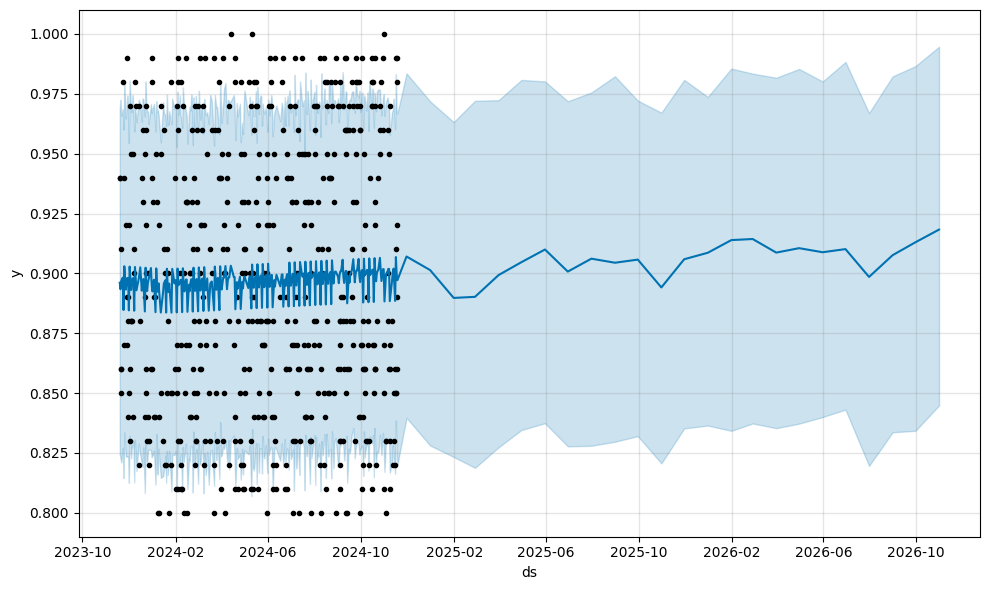

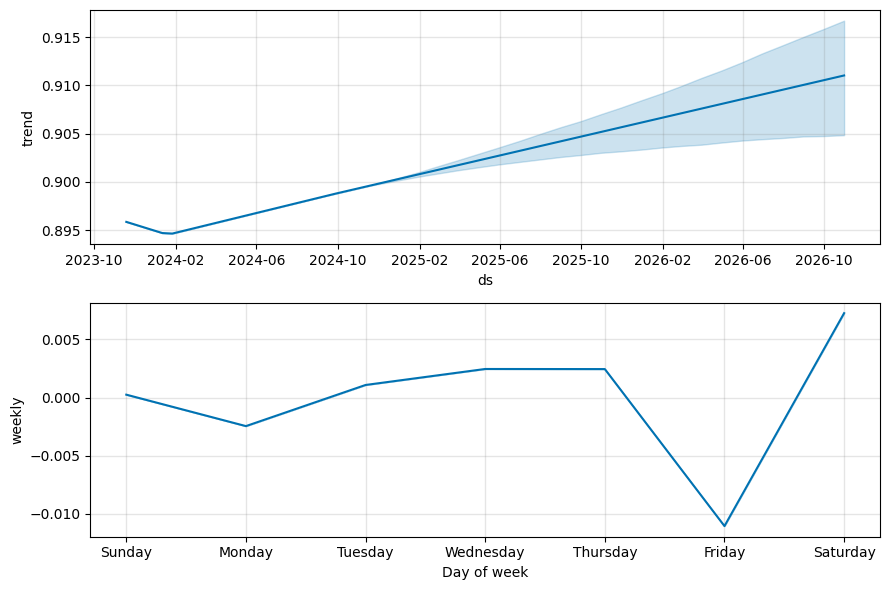

In [16]:
import pandas as pd
from prophet import Prophet

data = df

# Correct the column name if necessary
#data = data.rename(columns={'Incorrect_Date_Column_Name': 'DATE'})

# Convert the 'DATE' column to datetime format
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

# Prepare the data for Prophet
df = data[['TRACK_OUT_DATE', 'YIELD_RATE']]
df.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=24,freq='M')
forecast = model.predict(future)

# Evaluate the model on the training data
train_forecast = model.predict(df)
train_rmse = np.sqrt(mean_squared_error(df['y'], train_forecast['yhat']))
train_r2 = r2_score(df['y'], train_forecast['yhat'])
print('Training RMSE:', train_rmse)
print('Training R2:', train_r2)

# Visualize the forecasts
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

data = df

# Convert TRACK_OUT_DATE to datetime
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'], errors='coerce')

# Extract YEAR and MONTH
data['YEAR'] = data['TRACK_OUT_DATE'].dt.year
data['MONTH'] = data['TRACK_OUT_DATE'].dt.month

# Aggregate data by PRODUCT_TYPE, YEAR, and MONTH
monthly_data = data.groupby(['PRODUCT_TYPE', 'YEAR', 'MONTH']).agg({
    'YIELD_RATE': 'mean',
    'DEFECT_COUNT': 'mean',
    'TEMPERATURE': 'mean',
    'HUMIDITY': 'mean',
    'DOWNTIME': 'mean'
}).reset_index()

# Create a time index for forecasting
monthly_data['TIME_INDEX'] = (monthly_data['YEAR'] - monthly_data['YEAR'].min()) * 12 + monthly_data['MONTH']

# Features and target
features = ['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME']
target = 'YIELD_RATE'

# Split into training and test sets
train_data = monthly_data[monthly_data['TIME_INDEX'] < monthly_data['TIME_INDEX'].max() - 3]
test_data = monthly_data[monthly_data['TIME_INDEX'] >= monthly_data['TIME_INDEX'].max() - 3]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate R2 score for the training dataset
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R2 Score: {r2_train:.4f}")

# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Absolute Error: {mae:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")

# Forecast for the next 24 months
last_time_index = monthly_data['TIME_INDEX'].max()
forecast_data = []
for i in range(1, 25):
    next_time_index = last_time_index + i
    # Replace with average or predicted values for the features
    forecast_row = {
        'DEFECT_COUNT': np.mean(monthly_data['DEFECT_COUNT']),
        'TEMPERATURE': np.mean(monthly_data['TEMPERATURE']),
        'HUMIDITY': np.mean(monthly_data['HUMIDITY']),
        'DOWNTIME': np.mean(monthly_data['DOWNTIME']),
    }
    forecast_data.append(forecast_row)

forecast_df = pd.DataFrame(forecast_data)
forecast_df['PREDICTED_YIELD_RATE'] = model.predict(forecast_df)

print(forecast_df[['PREDICTED_YIELD_RATE']])


Training R2 Score: 0.9779
Test Mean Absolute Error: 0.0229
Test R2 Score: 0.8648
    PREDICTED_YIELD_RATE
0               0.661115
1               0.661115
2               0.661115
3               0.661115
4               0.661115
5               0.661115
6               0.661115
7               0.661115
8               0.661115
9               0.661115
10              0.661115
11              0.661115
12              0.661115
13              0.661115
14              0.661115
15              0.661115
16              0.661115
17              0.661115
18              0.661115
19              0.661115
20              0.661115
21              0.661115
22              0.661115
23              0.661115


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load and preprocess the data
data = df

# Convert TRACK_OUT_DATE to datetime
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'], errors='coerce')

# Extract YEAR and MONTH
data['YEAR'] = data['TRACK_OUT_DATE'].dt.year
data['MONTH'] = data['TRACK_OUT_DATE'].dt.month

# Aggregate data by PRODUCT_TYPE, YEAR, and MONTH
monthly_data = data.groupby(['PRODUCT_TYPE', 'YEAR', 'MONTH']).agg({
    'YIELD_RATE': 'mean',
    'DEFECT_COUNT': 'mean',
    'TEMPERATURE': 'mean',
    'HUMIDITY': 'mean',
    'DOWNTIME': 'mean'
}).reset_index()

# Create a time index for forecasting
monthly_data['TIME_INDEX'] = (monthly_data['YEAR'] - monthly_data['YEAR'].min()) * 12 + monthly_data['MONTH']

# Encode PRODUCT_TYPE using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_product_type = encoder.fit_transform(monthly_data[['PRODUCT_TYPE']])
encoded_product_type_df = pd.DataFrame(
    encoded_product_type, 
    columns=encoder.get_feature_names_out(['PRODUCT_TYPE'])
)
monthly_data = pd.concat([monthly_data, encoded_product_type_df], axis=1)

# Features and target
features = ['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME'] + list(encoded_product_type_df.columns)
target = 'YIELD_RATE'

# Split into training and test sets
train_data = monthly_data[monthly_data['TIME_INDEX'] < monthly_data['TIME_INDEX'].max() - 3]
test_data = monthly_data[monthly_data['TIME_INDEX'] >= monthly_data['TIME_INDEX'].max() - 3]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R2 Score: {r2_train:.4f}")

# Evaluate on test data
y_test_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MAE: {mae:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")

# Forecast for the next 24 months
last_time_index = monthly_data['TIME_INDEX'].max()
forecast_data = []

for product_type, encoded_row in zip(encoder.categories_[0], encoder.transform([[product_type]])):
    for i in range(1, 25):
        next_time_index = last_time_index + i
        forecast_row = {
            'DEFECT_COUNT': np.mean(monthly_data['DEFECT_COUNT']),
            'TEMPERATURE': np.mean(monthly_data['TEMPERATURE']),
            'HUMIDITY': np.mean(monthly_data['HUMIDITY']),
            'DOWNTIME': np.mean(monthly_data['DOWNTIME']),
            'TIME_INDEX': next_time_index
        }
        for col, value in zip(encoder.get_feature_names_out(['PRODUCT_TYPE']), encoded_row):
            forecast_row[col] = value
        forecast_row['PRODUCT_TYPE'] = product_type
        forecast_data.append(forecast_row)

forecast_df = pd.DataFrame(forecast_data)
forecast_df['PREDICTED_YIELD_RATE'] = model.predict(forecast_df[features])

# Display the predictions for the next 24 months
print(forecast_df[['PRODUCT_TYPE', 'TIME_INDEX', 'PREDICTED_YIELD_RATE']])


Training R2 Score: 0.9775
Test MAE: 0.0227
Test R2 Score: 0.8642
   PRODUCT_TYPE  TIME_INDEX  PREDICTED_YIELD_RATE
0         Acura          24               0.66489
1         Acura          25               0.66489
2         Acura          26               0.66489
3         Acura          27               0.66489
4         Acura          28               0.66489
5         Acura          29               0.66489
6         Acura          30               0.66489
7         Acura          31               0.66489
8         Acura          32               0.66489
9         Acura          33               0.66489
10        Acura          34               0.66489
11        Acura          35               0.66489
12        Acura          36               0.66489
13        Acura          37               0.66489
14        Acura          38               0.66489
15        Acura          39               0.66489
16        Acura          40               0.66489
17        Acura          41        

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load your dataset
data = df # Replace 'your_dataset.csv' with your file's name

# Convert TRACK_OUT_DATE to datetime
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'], errors='coerce')
data = data.sort_values(by='Track_out_date')

# One-hot encode the Data_Product column
encoder = OneHotEncoder(sparse=False)
encoded_products = encoder.fit_transform(data[['Data_Product']])
encoded_product_columns = encoder.get_feature_names_out(['Data_Product'])

# Add encoded columns to the dataset
encoded_df = pd.DataFrame(encoded_products, columns=encoded_product_columns, index=data.index)
data = pd.concat([data, encoded_df], axis=1)

# Features and target
X = data[['Defect_count', 'Temperature', 'Humidity', 'Downtime'] + list(encoded_product_columns)]
y = data['Yield_rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test data: {mse:.2f}')

# Predict for the next 24 months
future_dates = pd.date_range(start=data['Track_out_date'].max(), periods=24, freq='M')

# Create a dummy future dataset using average feature values
average_features = X.mean().values
future_features = np.tile(average_features, (24, 1))

future_predictions = model.predict(future_features)

# Save future predictions to a CSV
future_predictions_df = pd.DataFrame({
    'Future_date': future_dates,
    'Predicted_Yield_rate': future_predictions
})
print(future_predictions_df)


KeyError: 'Track_out_date'